In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('preprocessed_dataset.csv', index_col=0)

In [3]:
df.head()

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,начальник п,180000,90000,0,Никогда в браке не состоял(а),...,0,success,success,success,success,denied,77,137000,18,Furniture
2,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,директор,200000,60000,0,Никогда в браке не состоял(а),...,0,success,denied,success,denied,success,27,33000,6,Fitness
3,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000,45000,1,Никогда в браке не состоял(а),...,0,denied,denied,success,success,success,19,165000,24,Medical_services
4,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000,45000,1,Никогда в браке не состоял(а),...,0,success,denied,success,success,success,34,67000,12,Education
5,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,ДИРЕКТОР,300000,45000,1,Никогда в браке не состоял(а),...,0,success,denied,success,success,success,75,36000,6,Furniture


In [4]:
df.drop(['Position'], axis=1, inplace=True)

In [5]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['JobStartDate'] = pd.to_datetime(df['JobStartDate'])
df['MonthProfit'] = df['MonthProfit'].astype('UInt64')
df['MonthExpense'] = df['MonthExpense'].astype('UInt64')
df['Loan_amount'] = df['Loan_amount'].astype('UInt64')
df['SNILS'] = df['SNILS'].round().astype('UInt8')
df['Gender'] = df['Gender'].round().astype('UInt8')
df['Merch_code'] = df['Merch_code'].astype('UInt8')
df['ChildCount'] = df['ChildCount'].astype('UInt8')
df['Loan_term'] = df['Loan_term'].astype('UInt8')
df['SNILS'] = df['SNILS'].round().astype('category')
df['Gender'] = df['Gender'].round().astype('category')
df['education'] = df['education'].astype('category')
df['Family status'] = df['Family status'].astype('category')
df['Goods_category'] = df['Goods_category'].astype('category')
df['Value'] = df['Value'].astype('category')
df['Loan_term'] = df['Loan_term'].astype('category')
df['employment status'] = df['employment status'].astype('category')
for i in ('A', 'B', 'C', 'D', 'E'):
    df[f'Bank{i}_decision'] = df[f'Bank{i}_decision'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 1 to 8787
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6464 non-null   datetime64[ns]
 1   education          6464 non-null   category      
 2   employment status  6464 non-null   category      
 3   Value              6464 non-null   category      
 4   JobStartDate       6464 non-null   datetime64[ns]
 5   MonthProfit        6464 non-null   UInt64        
 6   MonthExpense       6464 non-null   UInt64        
 7   Gender             6464 non-null   category      
 8   Family status      6464 non-null   category      
 9   ChildCount         6464 non-null   UInt8         
 10  SNILS              6464 non-null   category      
 11  BankA_decision     6464 non-null   category      
 12  BankB_decision     6464 non-null   category      
 13  BankC_decision     6464 non-null   category      
 14  BankD_decisio

In [7]:
bankAds = df.copy()
bankBds = df.copy()
bankCds = df.copy()
bankDds = df.copy()
bankEds = df.copy()

In [8]:
bankAds.drop(['BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision'], axis=1, inplace=True)
bankBds.drop(['BankA_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision'], axis=1, inplace=True)
bankCds.drop(['BankA_decision', 'BankB_decision', 'BankD_decision', 'BankE_decision'], axis=1, inplace=True)
bankDds.drop(['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankE_decision'], axis=1, inplace=True)
bankEds.drop(['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision'], axis=1, inplace=True)

In [9]:
def drop_errors(df, bank):
    df[bank] = df[bank].replace('error', pd.NA)
    df.dropna(inplace=True)
    return df

In [10]:
banks_collumns = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']

In [11]:
bankAds = drop_errors(bankAds, 'BankA_decision')
bankBds = drop_errors(bankBds, 'BankB_decision')
bankCds = drop_errors(bankCds, 'BankC_decision')
bankDds = drop_errors(bankDds, 'BankD_decision')
bankEds = drop_errors(bankEds, 'BankE_decision')

In [12]:
bankAds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6395 entries, 1 to 8787
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6395 non-null   datetime64[ns]
 1   education          6395 non-null   category      
 2   employment status  6395 non-null   category      
 3   Value              6395 non-null   category      
 4   JobStartDate       6395 non-null   datetime64[ns]
 5   MonthProfit        6395 non-null   UInt64        
 6   MonthExpense       6395 non-null   UInt64        
 7   Gender             6395 non-null   category      
 8   Family status      6395 non-null   category      
 9   ChildCount         6395 non-null   UInt8         
 10  SNILS              6395 non-null   category      
 11  BankA_decision     6395 non-null   category      
 12  Merch_code         6395 non-null   UInt8         
 13  Loan_amount        6395 non-null   UInt64        
 14  Loan_term    

In [13]:
bankAds.to_csv('bankAds.csv')
bankBds.to_csv('bankBds.csv')
bankCds.to_csv('bankCds.csv')
bankDds.to_csv('bankDds.csv')
bankEds.to_csv('bankEds.csv')


In [14]:
bankAds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6395 entries, 1 to 8787
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6395 non-null   datetime64[ns]
 1   education          6395 non-null   category      
 2   employment status  6395 non-null   category      
 3   Value              6395 non-null   category      
 4   JobStartDate       6395 non-null   datetime64[ns]
 5   MonthProfit        6395 non-null   UInt64        
 6   MonthExpense       6395 non-null   UInt64        
 7   Gender             6395 non-null   category      
 8   Family status      6395 non-null   category      
 9   ChildCount         6395 non-null   UInt8         
 10  SNILS              6395 non-null   category      
 11  BankA_decision     6395 non-null   category      
 12  Merch_code         6395 non-null   UInt8         
 13  Loan_amount        6395 non-null   UInt64        
 14  Loan_term    

In [15]:
bankAds.head()

,BirthDate,education,employment status,Value,JobStartDate,MonthProfit,MonthExpense,Gender,Family status,ChildCount,SNILS,BankA_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,
1,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,180000,90000,0,Никогда в браке не состоял(а),0,0,success,77,137000,18,Furniture
2,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,200000,60000,0,Никогда в браке не состоял(а),0,0,success,27,33000,6,Fitness
3,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,300000,45000,1,Никогда в браке не состоял(а),0,0,denied,19,165000,24,Medical_services
4,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,300000,45000,1,Никогда в браке не состоял(а),0,0,success,34,67000,12,Education
5,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,300000,45000,1,Никогда в браке не состоял(а),0,0,success,75,36000,6,Furniture


In [16]:
bankAds['BankA_decision'].value_counts()

BankA_decision
success    4860
denied     1535
Name: count, dtype: int64

<Axes: xlabel='BankA_decision'>

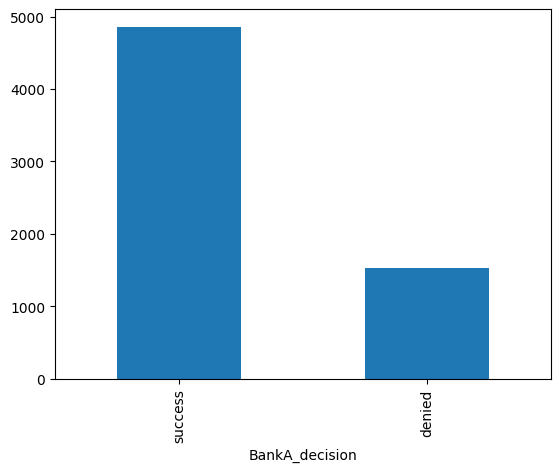

In [17]:
bankAds['BankA_decision'].value_counts().plot(kind='bar')

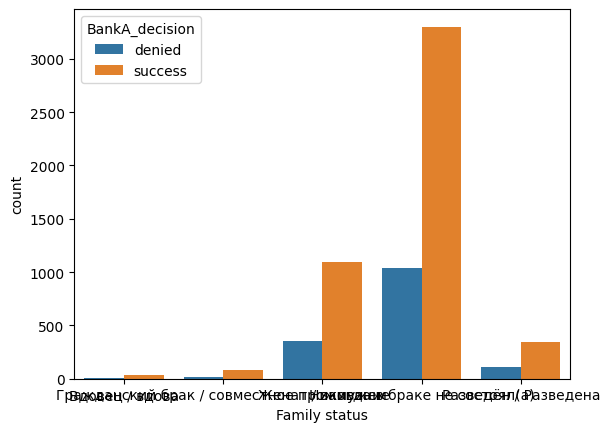

In [18]:
sns.countplot(x='Family status', hue='BankA_decision', data=bankAds)
sns.axes_style('whitegrid')
plt.show()


<Axes: xlabel='Loan_term', ylabel='count'>

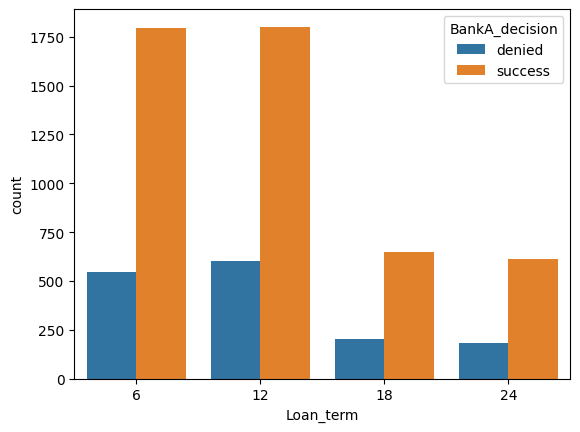

In [19]:
sns.countplot(x='Loan_term', hue='BankA_decision', data=bankAds)
# bankAds['Loan_term'].value_counts().plot(kind='bar')

<Axes: xlabel='education', ylabel='count'>

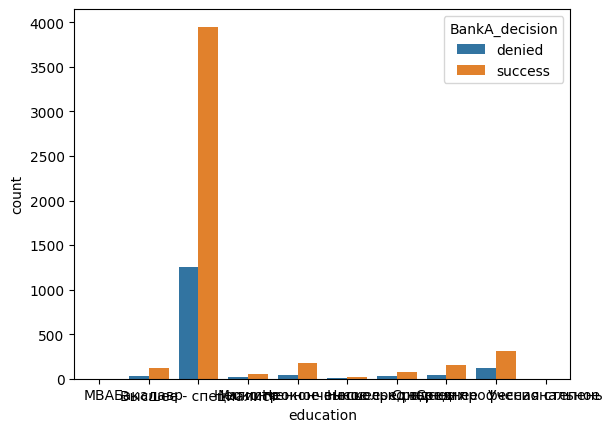

In [20]:
sns.countplot(x='education', hue='BankA_decision', data=bankAds)

In [21]:
# # Select columns related to bank decisions
# bank_decisions_by_snils = ['BankA_decision', 'Gender']

# # Create a DataFrame containing only bank decision columns
# bank_decisions_by_snils_df = df[bank_decisions_by_snils]

# # Map 'success' and 'denied' to numeric values (1 and 0)
# bank_decisions_df_numeric = pd.DataFrame()
# bank_decisions_df_numeric['BankA_decision'] = bank_decisions_by_snils_df['BankA_decision'].map(lambda x: 1 if x == 'success' else 0)
# bank_decisions_df_numeric['Gender'] = bank_decisions_by_snils_df['Gender']


# # Calculate the correlation matrix
# correlation_matrix = bank_decisions_df_numeric.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Heatmap for Bank Decisions')
# plt.show()

In [22]:
import pandas as pd

def remove_outliers_iqr(df, multiplier=1.5):
    """
    Remove outliers from numeric columns in a DataFrame using the IQR method.

    Parameters:
    - df: pandas DataFrame
    - multiplier: Multiplier to control the range of the IQR (default is 1.5)

    Returns:
    - DataFrame with outliers removed
    """
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Create a copy of the original DataFrame
    df_no_outliers = df.copy()

    # Iterate through numeric columns and remove outliers using IQR method
    for column in numeric_columns:
        # Calculate IQR
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Remove outliers
        outliers_mask = (df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)
        df_no_outliers = df_no_outliers[outliers_mask]

    return df_no_outliers


In [23]:
cleared_bankAds = remove_outliers_iqr(bankAds)

In [25]:
cleared_bankAds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5759 entries, 3 to 8787
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          5759 non-null   datetime64[ns]
 1   education          5759 non-null   category      
 2   employment status  5759 non-null   category      
 3   Value              5759 non-null   category      
 4   JobStartDate       5759 non-null   datetime64[ns]
 5   MonthProfit        5759 non-null   UInt64        
 6   MonthExpense       5759 non-null   UInt64        
 7   Gender             5759 non-null   category      
 8   Family status      5759 non-null   category      
 9   ChildCount         5759 non-null   UInt8         
 10  SNILS              5759 non-null   category      
 11  BankA_decision     5759 non-null   category      
 12  Merch_code         5759 non-null   UInt8         
 13  Loan_amount        5759 non-null   UInt64        
 14  Loan_term    